In [0]:
#Data preprocessing starts here
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

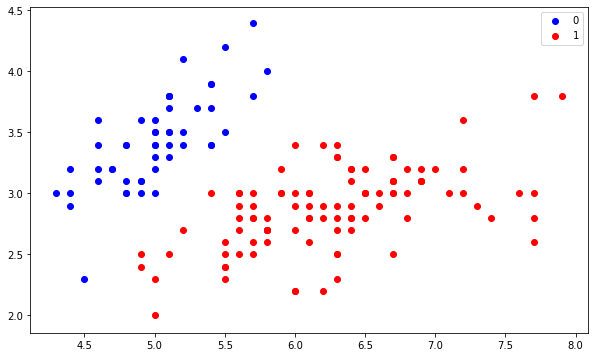

In [2]:
iris = datasets.load_iris()



x = iris.data[:, :2]
y = (iris.target != 0) * 1

#print(x)
#print(y)

plt.figure(figsize=(10, 6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='b', label='0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='r', label='1')
plt.legend();
#Data preprocessing ends here
x = x.tolist()
for i in x:
  i.append(1)
  
x = np.array(x)



In [3]:
Train_data = []
Train_target = []
Test_data = []
Test_target = []
Validation_data = []
Validation_target = []

for i in range(0, len(x)):
  num = random.uniform(0, 1)
  if(num>0.7 and num <= 0.85):
    Validation_data.append(x[i])
    Validation_target.append(y[i])
  elif(num>0.85 and num<=1.0):
    Test_data.append(x[i])
    Test_target.append(y[i])
  else:
    Train_data.append(x[i])
    Train_target.append(y[i])
    
print(len(Train_data))
print(len(Validation_data))
print(len(Test_data))

112
15
23


In [0]:
def calculate_der(x,y,h):
  return x*(h-y)

In [0]:
lr = 0.001
theta = []
theta.append(random.uniform(0.001,1))
theta.append(random.uniform(0.001,1))
theta.append(random.uniform(0.001,1))



for i in range(30000):
  total_loss = 0
  
  dj_0 = 0
  dj_1 = 0
  dj_2 = 0
  
  for k in range(len(Train_data)):
    z = Train_data[k][0]*theta[0] + Train_data[k][1]*theta[1] + Train_data[k][2]*theta[2]
    h = 1 / (1 + np.exp(-z))
    j = ((-Train_target[k]) * np.log(h+0.00001) - (1-Train_target[k])*np.log(1-(h+0.000001)))
    dj_0 = dj_0 + calculate_der(Train_data[k][0],Train_target[k],h)
    dj_1 = dj_1 + calculate_der(Train_data[k][1],Train_target[k],h)
    dj_2 = dj_2 + calculate_der(Train_data[k][2],Train_target[k],h)
    
    total_loss = total_loss + j
  
  m = len(Train_data)
  avg_loss = (1/m)*total_loss
  avg_dj_0 = (1/m)*dj_0
  avg_dj_1 = (1/m)*dj_1
  avg_dj_2 = (1/m)*dj_2
  
  theta[0] = theta[0] - lr * avg_dj_0 
  theta[1] = theta[1] - lr * avg_dj_1
  theta[2] = theta[2] - lr * avg_dj_2
  
  print(avg_loss)
  
    

Streaming output truncated to the last 5000 lines.
0.29388422938613096
0.29387104512723145
0.2938578622777502
0.2938446808374673
0.293831500806164
0.293818322183621
0.2938051449696185
0.2937919691639377
0.29377879476635954
0.2937656217766646
0.2937524501946343
0.2937392800200491
0.2937261112526903
0.29371294389233893
0.2936997779387762
0.2936866133917829
0.29367345025114056
0.2936602885166306
0.29364712818803373
0.29363396926513136
0.2936208117477054
0.2936076556355368
0.2935945009284071
0.29358134762609817
0.2935681957283907
0.2935550452350673
0.2935418961459089
0.2935287484606974
0.29351560217921446
0.2935024573012415
0.29348931382656107
0.29347617175495444
0.2934630310862039
0.29344989182009074
0.29343675395639757
0.2934236174949063
0.2934104824353986
0.2933973487776568
0.2933842165214632
0.2933710856665997
0.2933579562128488
0.2933448281599924
0.29333170150781324
0.29331857625609337
0.29330545240461536
0.29329232995316157
0.29327920890151443
0.2932660892494566
0.2932529709967708
0.

In [0]:
count = 0
for i in range(len(Validation_data)):
  z = Validation_data[i][0]*theta[0] + Validation_data[i][1]*theta[1] + Validation_data[i][2]*theta[2]
  h = 1 / (1 + np.exp(-z))
  
  if h>=.5:
    h=1
  elif h<.5:
    h=0
    
  if h==Validation_target[i]:
    count=count+1
accuracy = (count/len(Validation_data))*100
print(accuracy)
    
  
  

100.0
